In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from datetime import datetime
import time

***************
DATA PROCESSING PHASE 1
***************

In [2]:
file_path = '/Users/chiaradraghini/Documents/mrn_project/data/'

data_march = pd.read_csv(file_path+'original_data/Milano_800_March_MRN.csv') 
data_march['Date'] = pd.to_datetime(data_march['Date']) 

In [3]:
Mondays = pd.DataFrame()
Tuesdays = pd.DataFrame()
Wednesdays = pd.DataFrame()
Thursdays = pd.DataFrame()
Fridays = pd.DataFrame()
Saturdays = pd.DataFrame()
Sundays = pd.DataFrame()

#first days of the week in March as starting point
Mon = 2
Tue = 3
Wed = 4
Thu = 5
Fri = 6
Sat = 7
Sun = 1

#creating new csv files for each day of the week with the corresponding hourly data 
while(Mon<31):
    monday = data_march[data_march['Date'] < pd.Timestamp(year=2020, month=3, day=(Mon+1), hour=0, minute=0)]
    monday = monday[monday['Date'] > pd.Timestamp(year=2020, month=3, day=(Mon-1), hour=23, minute=59)]
    Mon = Mon + 7
    Mondays = Mondays.append(monday)
Mondays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Mondays_mar.csv', index=False)

while(Tue<32):
    tuesday = data_march[data_march['Date'] < pd.Timestamp(year=2020, month=3, day=(Tue), hour=23, minute=59)]
    tuesday = tuesday[tuesday['Date'] > pd.Timestamp(year=2020, month=3, day=(Tue-1), hour=23, minute=59)]
    Tue = Tue + 7
    Tuesdays = Tuesdays.append(tuesday)
Tuesdays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Tuesdays_mar.csv', index=False)

while(Wed<26):
    wednesday = data_march[data_march['Date'] < pd.Timestamp(year=2020, month=3, day=(Wed+1), hour=0, minute=0)]
    wednesday = wednesday[wednesday['Date'] >= pd.Timestamp(year=2020, month=3, day=(Wed), hour=0, minute=0)]
    Wed = Wed + 7
    Wednesdays = Wednesdays.append(wednesday)
Wednesdays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Wednesdays_mar.csv', index=False)

while(Thu<27):
    thursday = data_march[data_march['Date'] < pd.Timestamp(year=2020, month=3, day=(Thu+1), hour=0, minute=0)]
    thursday = thursday[thursday['Date'] > pd.Timestamp(year=2020, month=3, day=(Thu-1), hour=23, minute=59)]
    Thu = Thu + 7
    Thursdays = Thursdays.append(thursday)
Thursdays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Thursdays_mar.csv', index=False)

while(Fri<28):
    friday = data_march[data_march['Date'] <= pd.Timestamp(year=2020, month=3, day=(Fri), hour=23, minute=59)]
    friday = friday[friday['Date'] > pd.Timestamp(year=2020, month=3, day=(Fri-1), hour=23, minute=59)]
    Fri = Fri + 7
    Fridays = Fridays.append(friday)
Fridays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Fridays_mar.csv', index=False)

while(Sat<29):
    saturday = data_march[data_march['Date'] < pd.Timestamp(year=2020, month=3, day=(Sat+1), hour=0, minute=0)]
    saturday = saturday[saturday['Date'] > pd.Timestamp(year=2020, month=3, day=(Sat-1), hour=23, minute=59)]
    Sat = Sat + 7
    Saturdays = Saturdays.append(saturday)
Saturdays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Saturdays_mar.csv', index=False)

while(Sun<30):
    sunday = data_march[data_march['Date'] < pd.Timestamp(year=2020, month=3, day=(Sun+1), hour=0, minute=0)]
    sunday = sunday[sunday['Date'] >= pd.Timestamp(year=2020, month=3, day=(Sun), hour=0, minute=0)]
    Sun = Sun + 7
    Sundays = Sundays.append(sunday)
Sundays.to_csv(r'/Users/chiaradraghini/Documents/mrn_project/data/weekdays/march/Sundays_mar.csv', index=False)

***************
DATA PROCESSING PHASE 2
***************

In [4]:
cols_to_keep = ['ECELL_ID', 'Date', 'DL_VOL', 'UL_VOL', 'CS_SR', 'InterF_Hout_SR']

mon_mar = pd.read_csv(file_path+'weekdays/march/Mondays_mar.csv')
mon_mar['Date'] = pd.to_datetime(mon_mar['Date'])
mon_mar_DL = mon_mar.loc[:,cols_to_keep]
mon_mar_index = mon_mar_DL.set_index("Date")

'''*****************************************************************************************'''
                                             
tue_mar = pd.read_csv(file_path+'weekdays/march/Tuesdays_mar.csv')
tue_mar['Date'] = pd.to_datetime(tue_mar['Date'])
tue_mar_DL = tue_mar.loc[:,cols_to_keep]
tue_mar_index = tue_mar_DL.set_index("Date")
                                             
'''*****************************************************************************************'''

wed_mar = pd.read_csv(file_path+'weekdays/march/Wednesdays_mar.csv')
wed_mar['Date'] = pd.to_datetime(wed_mar['Date'])
wed_mar_DL = wed_mar.loc[:,cols_to_keep]
wed_mar_index = wed_mar_DL.set_index("Date")

'''*****************************************************************************************'''

thu_mar = pd.read_csv(file_path+'weekdays/march/Thursdays_mar.csv')
thu_mar['Date'] = pd.to_datetime(thu_mar['Date']) 
thu_mar_DL = thu_mar.loc[:,cols_to_keep]
thu_mar_index = thu_mar_DL.set_index("Date")

'''*****************************************************************************************'''

fri_mar = pd.read_csv(file_path+'weekdays/march/Fridays_mar.csv') 
fri_mar['Date'] = pd.to_datetime(fri_mar['Date']) 
fri_mar_DL = fri_mar.loc[:,cols_to_keep]
fri_mar_index = fri_mar_DL.set_index("Date")

'''*****************************************************************************************'''

sat_mar = pd.read_csv(file_path+'weekdays/march/Saturdays_mar.csv')
sat_mar['Date'] = pd.to_datetime(sat_mar['Date'])
sat_mar_DL = sat_mar.loc[:,cols_to_keep]
sat_mar_index = sat_mar_DL.set_index("Date")

'''*****************************************************************************************'''
  
sun_mar = pd.read_csv(file_path+'weekdays/march/Sundays_mar.csv') 
sun_mar['Date'] = pd.to_datetime(sun_mar['Date'])
sun_mar_DL = sun_mar.loc[:,cols_to_keep]
sun_mar_index = sun_mar_DL.set_index("Date")

In [5]:
#creating an array of cells with no duplicates (original dataset has duplicates meaning that the same cell gathers traffic data for every hour)
ecell_id = mon_mar_index["ECELL_ID"].to_list()
array_of_cells = []
for i in range(len(ecell_id)):
        if not (ecell_id[i] in array_of_cells):
            array_of_cells.append(ecell_id[i])

***************
MEDIAN COMPUTATION
***************

In [6]:
#creating a new dataframe with hourly DL_VOL medians for each Monday of the month and every cell\n",
df0_mar = pd.DataFrame()
df1_mar = pd.DataFrame()
df2_mar = pd.DataFrame()
df3_mar = pd.DataFrame()
df4_mar = pd.DataFrame()
df5_mar = pd.DataFrame()
df6_mar = pd.DataFrame()

rows0 = []
rows1 = []
rows2 = []
rows3 = []
rows4 = []
rows5 = []
rows6 = []
   

for i in array_of_cells:
        
        df_idfiltered0 = mon_mar_index[mon_mar_index['ECELL_ID'] == i]
        df_idfiltered1 = tue_mar_index[tue_mar_index['ECELL_ID'] == i]
        df_idfiltered2 = wed_mar_index[wed_mar_index['ECELL_ID'] == i]
        df_idfiltered3 = thu_mar_index[thu_mar_index['ECELL_ID'] == i]
        df_idfiltered4 = fri_mar_index[fri_mar_index['ECELL_ID'] == i]
        df_idfiltered5 = sat_mar_index[sat_mar_index['ECELL_ID'] == i]
        df_idfiltered6 = sun_mar_index[sun_mar_index['ECELL_ID'] == i]
        
        x = 0
        while (x <= 23):
            df_hfiltered0 = df_idfiltered0[df_idfiltered0.index.hour == x]
            df_hfiltered1 = df_idfiltered1[df_idfiltered1.index.hour == x]
            df_hfiltered2 = df_idfiltered2[df_idfiltered2.index.hour == x]
            df_hfiltered3 = df_idfiltered3[df_idfiltered3.index.hour == x]
            df_hfiltered4 = df_idfiltered4[df_idfiltered4.index.hour == x]
            df_hfiltered5 = df_idfiltered5[df_idfiltered5.index.hour == x]
            df_hfiltered6 = df_idfiltered6[df_idfiltered6.index.hour == x]
            
            y = str(x)
            
            medianDL_VOL0 = df_hfiltered0['DL_VOL'].median()
            medianDL_VOL1 = df_hfiltered1['DL_VOL'].median()
            medianDL_VOL2 = df_hfiltered2['DL_VOL'].median()
            medianDL_VOL3 = df_hfiltered3['DL_VOL'].median()
            medianDL_VOL4 = df_hfiltered4['DL_VOL'].median()
            medianDL_VOL5 = df_hfiltered5['DL_VOL'].median()
            medianDL_VOL6 = df_hfiltered6['DL_VOL'].median()
            
            medianUL_VOL0 = df_hfiltered0['UL_VOL'].median()
            medianUL_VOL1 = df_hfiltered1['UL_VOL'].median()
            medianUL_VOL2 = df_hfiltered2['UL_VOL'].median()
            medianUL_VOL3 = df_hfiltered3['UL_VOL'].median()
            medianUL_VOL4 = df_hfiltered4['UL_VOL'].median()
            medianUL_VOL5 = df_hfiltered5['UL_VOL'].median()
            medianUL_VOL6 = df_hfiltered6['UL_VOL'].median()
            
            medianCS_SR0 = df_hfiltered0['CS_SR'].median()
            medianCS_SR1 = df_hfiltered1['CS_SR'].median()
            medianCS_SR2 = df_hfiltered2['CS_SR'].median()
            medianCS_SR3 = df_hfiltered3['CS_SR'].median()
            medianCS_SR4 = df_hfiltered4['CS_SR'].median()
            medianCS_SR5 = df_hfiltered5['CS_SR'].median()
            medianCS_SR6 = df_hfiltered6['CS_SR'].median()
            
            medianInterF_Hout_SR0 = df_hfiltered0['InterF_Hout_SR'].median()
            medianInterF_Hout_SR1 = df_hfiltered1['InterF_Hout_SR'].median()
            medianInterF_Hout_SR2 = df_hfiltered2['InterF_Hout_SR'].median()
            medianInterF_Hout_SR3 = df_hfiltered3['InterF_Hout_SR'].median()
            medianInterF_Hout_SR4 = df_hfiltered4['InterF_Hout_SR'].median()
            medianInterF_Hout_SR5 = df_hfiltered5['InterF_Hout_SR'].median()
            medianInterF_Hout_SR6 = df_hfiltered6['InterF_Hout_SR'].median()           
            
            
            rows0.append([i,"Monday at "+y,medianDL_VOL0,medianUL_VOL0,
                             medianCS_SR0,medianInterF_Hout_SR0])
            rows1.append([i,"Tuesday at "+y,medianDL_VOL1,medianUL_VOL1,
                             medianCS_SR1,medianInterF_Hout_SR1])
            rows2.append([i,"Wednesday at "+y,medianDL_VOL2,medianUL_VOL2,
                             medianCS_SR2,medianInterF_Hout_SR2])
            rows3.append([i,"Thursday at "+y,medianDL_VOL3,medianUL_VOL3,
                             medianCS_SR3,medianInterF_Hout_SR3])
            rows4.append([i,"Friday at "+y,medianDL_VOL4,medianUL_VOL4,
                             medianCS_SR4,medianInterF_Hout_SR4])
            rows5.append([i,"Saturday at "+y,medianDL_VOL5,medianUL_VOL5,
                             medianCS_SR5,medianInterF_Hout_SR5])
            rows6.append([i,"Sunday at "+y,medianDL_VOL6,medianUL_VOL6,
                             medianCS_SR6,medianInterF_Hout_SR6])
            
            x = x + 1
            
        df0_mar = pd.DataFrame(rows0)
        df1_mar = pd.DataFrame(rows1)
        df2_mar = pd.DataFrame(rows2)
        df3_mar = pd.DataFrame(rows3)
        df4_mar = pd.DataFrame(rows4)
        df5_mar = pd.DataFrame(rows5)
        df6_mar = pd.DataFrame(rows6)
    
df0_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df1_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df2_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df3_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df4_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df5_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df6_mar.columns = ["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"]
df0_mar
    

,ECELL_ID,Hours,Median DL_VOL,Median UL_VOL,Median CS_SR,Median InterF_Hout_SR
0,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 0,23802664.0,2608680.0,9681.0,94.871795
1,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 1,21540528.0,1696384.0,11222.0,93.750000
2,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 2,8867864.0,896888.0,11012.0,84.375000
3,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 3,4453160.0,871024.0,10019.0,78.846154
4,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 4,6408128.0,233152.0,9609.0,84.210526
...,...,...,...,...,...,...
9475,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 19,9920784.0,1541976.0,7662.0,97.492163
9476,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 20,9378312.0,1086632.0,8511.0,95.294118
9477,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 21,10353168.0,971280.0,8133.0,95.774648
9478,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 22,8609352.0,847600.0,7458.0,93.750000


***********
BUILDING CELL DATAFRAME
***********

In [7]:
allcell_MWS_mar = pd.DataFrame()
for i in array_of_cells:
    cell1_mon = df0_mar[df0_mar['ECELL_ID'] == i]
    cell1_tue = df1_mar[df1_mar['ECELL_ID'] == i]
    cell1_wed = df2_mar[df2_mar['ECELL_ID'] == i]
    cell1_thu = df3_mar[df3_mar['ECELL_ID'] == i]
    cell1_fri = df4_mar[df4_mar['ECELL_ID'] == i]
    cell1_sat = df5_mar[df5_mar['ECELL_ID'] == i]
    cell1_sun = df6_mar[df6_mar['ECELL_ID'] == i]
    
    cell_MWS_mar = cell1_mon.append([cell1_tue, cell1_wed, cell1_thu, cell1_fri, cell1_sat, cell1_sun])
    allcell_MWS_mar=allcell_MWS_mar.append(cell_MWS_mar)
    
allcell_MWS_mar.reset_index(drop=True, inplace=True)
allcell_MWS_mar

,ECELL_ID,Hours,Median DL_VOL,Median UL_VOL,Median CS_SR,Median InterF_Hout_SR
0,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 0,23802664.0,2608680.0,9681.0,94.871795
1,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 1,21540528.0,1696384.0,11222.0,93.750000
2,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 2,8867864.0,896888.0,11012.0,84.375000
3,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 3,4453160.0,871024.0,10019.0,78.846154
4,b7de6cd46e855aaec8e28b26d1767e7a738819db,Monday at 4,6408128.0,233152.0,9609.0,84.210526
...,...,...,...,...,...,...
66355,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 19,11079664.0,1350200.0,8300.0,94.863014
66356,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 20,12936024.0,983008.0,8016.0,91.052632
66357,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 21,10708208.0,1093104.0,8398.0,95.364238
66358,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 22,7208688.0,1212240.0,6949.0,96.644295


In [8]:
#splitting allcell_MWS into dataframes by ECELL_IDs
dataframe_collection_mar = {} 
for i in array_of_cells:
    dataframe_collection_mar[i] = pd.DataFrame(allcell_MWS_mar[allcell_MWS_mar['ECELL_ID'] == i], columns=["ECELL_ID","Hours","Median DL_VOL","Median UL_VOL", "Median CS_SR", "Median InterF_Hout_SR"])
    
#we need the index to reset every 168 rows
    for j in dataframe_collection_mar:
        dataframe_collection_mar[j].reset_index(drop=True, inplace=True) 
dataframe_collection_mar[i]
#len(dataframe_collection) #this checks we have 395 dataframes (correct!)

,ECELL_ID,Hours,Median DL_VOL,Median UL_VOL,Median CS_SR,Median InterF_Hout_SR
0,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 0,11181960.0,1684400.0,5689.0,94.736842
1,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 1,9165024.0,570272.0,5215.0,91.228070
2,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 2,8045264.0,456528.0,5337.0,91.489362
3,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 3,2705216.0,193688.0,4995.0,100.000000
4,3b99faafa552a3deb33f45826e79bec090cc4084,Monday at 4,2114312.0,259752.0,5272.0,96.000000
...,...,...,...,...,...,...
163,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 19,11079664.0,1350200.0,8300.0,94.863014
164,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 20,12936024.0,983008.0,8016.0,91.052632
165,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 21,10708208.0,1093104.0,8398.0,95.364238
166,3b99faafa552a3deb33f45826e79bec090cc4084,Sunday at 22,7208688.0,1212240.0,6949.0,96.644295


*************************
MEDIAN DATA VISUALIZATION
*************************

#plot DL_VOL median data for each ECELL_ID 
x=0
for i in array_of_cells:
        fig,ax= plt.subplots(figsize=(5,2))
        ax.plot(list(range(0,len(dataframe_collection_mar[i]))),dataframe_collection_mar[i]["Median DL_VOL"], linestyle='-', lw=2, color='b', alpha=.8)
        ticksx_label = dataframe_collection_mar[i]["Hours"]
        ticksx = [12, 36, 60, 84, 108, 132, 156] #print *dayoftheweek* at 12 as tick on x axis
        plt.xticks(ticks = ticksx,labels = ticksx_label[ticksx],fontsize = 5, color ='white')    
        plt.yticks(color ='white')
        plt.title('Median Hourly Trace of DL_VOL - Cell Id:'+array_of_cells[x], color='white',fontsize=8)
        plt.grid()
        fig,ax= plt.subplots(figsize=(5,2))
        ax.plot(list(range(0,len(dataframe_collection_mar[i]))),dataframe_collection_mar[i]["Median UL_VOL"], linestyle='-', lw=2, color='b', alpha=.8)
        ticksx_label = dataframe_collection_mar[i]["Hours"]
        ticksx = [12, 36, 60, 84, 108, 132, 156] #print *dayoftheweek* at 12 as tick on x axis
        plt.xticks(ticks = ticksx,labels = ticksx_label[ticksx],fontsize = 5, color ='white')    
        plt.yticks(color ='white')
        plt.title('Median Hourly Trace of UL_VOL - Cell Id:'+array_of_cells[x], color='white',fontsize=8)
        plt.grid()
        x=x+1

In [36]:
#select a single cell from allcell_MWS and plot its KPI median data
interested_cell_mar = "087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc"  
MWS_mar = allcell_MWS_mar[allcell_MWS_mar['ECELL_ID'] == interested_cell_mar]
MWS_mar.reset_index(drop=True, inplace=True)
MWS_mar

,ECELL_ID,Hours,Median DL_VOL,Median UL_VOL,Median CS_SR,Median InterF_Hout_SR
0,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Monday at 0,5935120.0,476472.0,3019.0,97.500000
1,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Monday at 1,32991632.0,2069192.0,5235.0,100.000000
2,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Monday at 2,19206784.0,1033392.0,5455.0,100.000000
3,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Monday at 3,10131608.0,749848.0,4829.0,100.000000
4,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Monday at 4,4176360.0,203080.0,4420.0,94.117647
...,...,...,...,...,...,...
163,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Sunday at 19,8606432.0,898328.0,4641.0,98.477157
164,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Sunday at 20,6309872.0,800408.0,4979.0,97.894737
165,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Sunday at 21,6756608.0,1033200.0,4640.0,98.630137
166,087aa4fdc05a3b32fc33f8af4fc17d1fbda02ecc,Sunday at 22,4144536.0,1076520.0,4537.0,99.090909


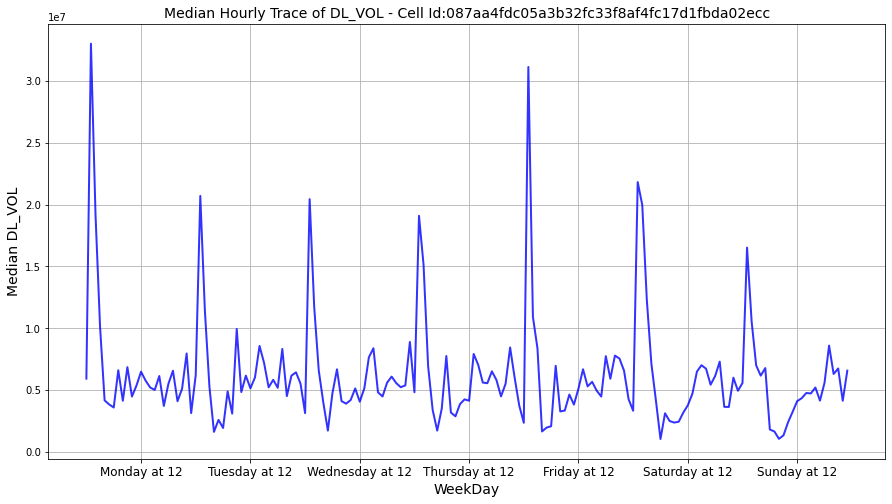

In [37]:
fig,ax= plt.subplots(figsize=(15,8))
#DL VOL selected
ax.plot(list(range(0,len(MWS_mar))),MWS_mar["Median DL_VOL"], linestyle='-', lw=2, color='b', alpha=.8)
plt.xlabel('WeekDay', color='black', fontsize=14)
plt.ylabel('Median DL_VOL', color='black', fontsize=14) 
ticksx_label = MWS_mar["Hours"]  
ticksx = [12, 36, 60, 84, 108, 132, 156] #print *dayoftheweek* at 12 as tick on x axis
plt.xticks(ticks = ticksx,labels = ticksx_label[ticksx],fontsize = 12, color ='black')
plt.yticks(color ='black')
plt.title('Median Hourly Trace of DL_VOL - Cell Id:'+interested_cell_mar, color='black',fontsize=14)
plt.grid()

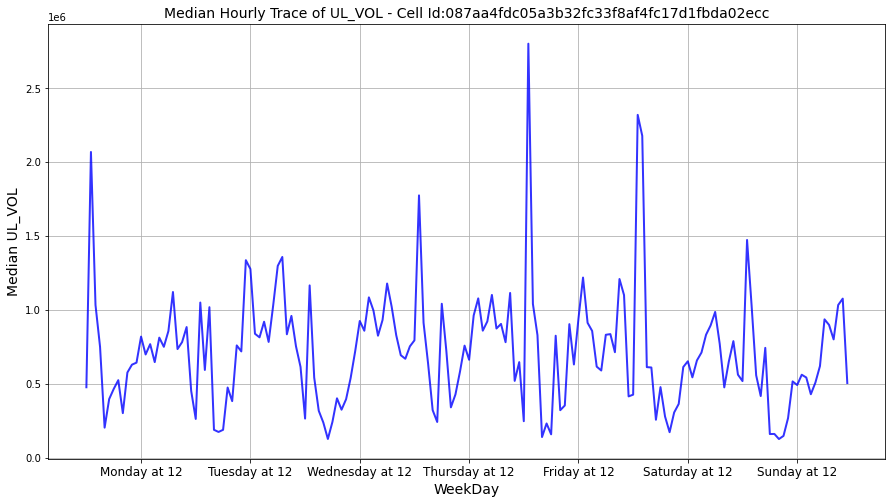

In [38]:
fig,ax= plt.subplots(figsize=(15,8))
#UL VOL selected
ax.plot(list(range(0,len(MWS_mar))),MWS_mar["Median UL_VOL"], linestyle='-', lw=2, color='b', alpha=.8)
plt.xlabel('WeekDay', color='black', fontsize=14)
plt.ylabel('Median UL_VOL', color='black', fontsize=14) 
ticksx_label = MWS_mar["Hours"]  
ticksx = [12, 36, 60, 84, 108, 132, 156] #print *dayoftheweek* at 12 as tick on x axis
plt.xticks(ticks = ticksx,labels = ticksx_label[ticksx],fontsize = 12, color ='black')
plt.yticks(color ='black')
plt.title('Median Hourly Trace of UL_VOL - Cell Id:'+interested_cell_mar, color='black',fontsize=14)
plt.grid()

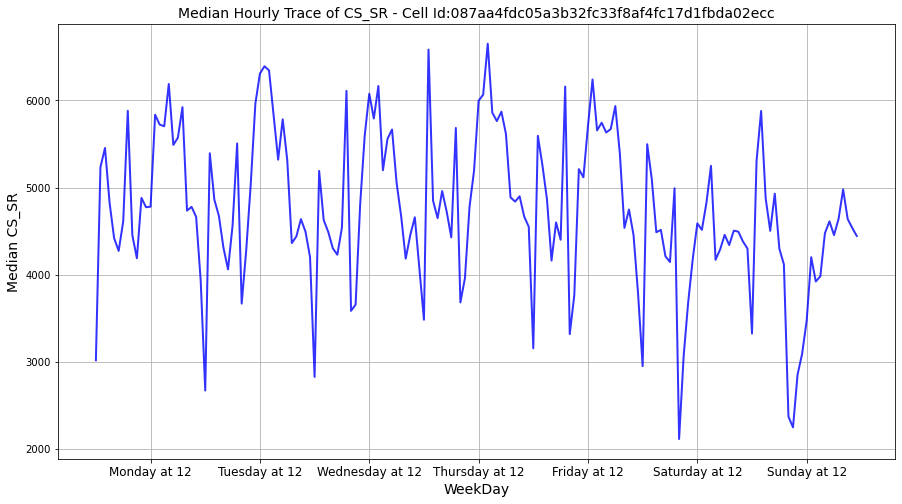

In [39]:
fig,ax= plt.subplots(figsize=(15,8))
#CS_SR selected
ax.plot(list(range(0,len(MWS_mar))),MWS_mar["Median CS_SR"], linestyle='-', lw=2, color='b', alpha=.8)
plt.xlabel('WeekDay', color='black', fontsize=14)
plt.ylabel('Median CS_SR', color='black', fontsize=14) 
ticksx_label = MWS_mar["Hours"]  
ticksx = [12, 36, 60, 84, 108, 132, 156] #print *dayoftheweek* at 12 as tick on x axis
plt.xticks(ticks = ticksx,labels = ticksx_label[ticksx],fontsize = 12, color ='black')
plt.yticks(color ='black')
plt.title('Median Hourly Trace of CS_SR - Cell Id:'+interested_cell_mar, color='black',fontsize=14)
plt.grid()

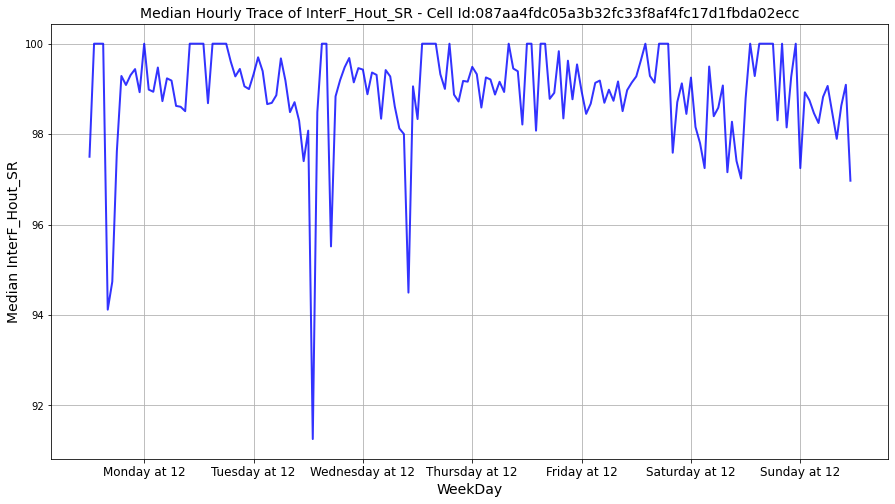

In [40]:
fig,ax= plt.subplots(figsize=(15,8))
#InterF_Hout_SR selected
ax.plot(list(range(0,len(MWS_mar))),MWS_mar["Median InterF_Hout_SR"], linestyle='-', lw=2, color='b', alpha=.8)
plt.xlabel('WeekDay', color='black', fontsize=14)
plt.ylabel('Median InterF_Hout_SR', color='black', fontsize=14) 
ticksx_label = MWS_mar["Hours"]  
ticksx = [12, 36, 60, 84, 108, 132, 156] #print *dayoftheweek* at 12 as tick on x axis
plt.xticks(ticks = ticksx,labels = ticksx_label[ticksx],fontsize = 12, color ='black')
plt.yticks(color ='black')
plt.title('Median Hourly Trace of InterF_Hout_SR - Cell Id:'+interested_cell_mar, color='black',fontsize=14)
plt.grid()